# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) typically consists of several key components or stages that guide data scientists through the process of understanding and exploring a dataset. These components can vary depending on the specific goals of the analysis and the characteristics of the data, but commonly include:
1) Data Collection
2) Data Cleaning and Preprocessing
3) Descriptive Statistics
4) Univariate Analysis
5) Bivariate Analysis
6) Multivariate Analysis
7) Feature Engineering
8) Visualization

EDA levels:
1) EDA Level 0 — Pure Understanding of Original Data
2) EDA Level 1 — Transformation of Original Data
3) EDA Level 2 — Understanding of Transformed Data

# Libs

In [1]:
import requests
import zipfile
import io
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
url = 'https://github.com/ikoghoemmanuell/Forecasting_of_Food_Demand_Supply_Chain/raw/refs/heads/main/assets/data/Forecasting_of_Food_Demand.zip'
response = requests.get(url)

### Open the ZIP file in memory
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    file_names = zip_ref.namelist()
    # Get the last CSV file inside the ZIP
    with zip_ref.open(file_names[-1]) as csv_file:
        df = pd.read_csv(csv_file)

df.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270


# EDA Level 0

Roughly gauge how significant the distinct values are in the dataset by basic check on:
- `column datatype`, `null counts`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


- `distinct values`, `distinct values count`

In [4]:
distinct_values = pd.DataFrame({'num_of_distint_value': df.nunique(), 'distinct_values_count': [dict(df[col].value_counts()) for col in df.columns]}, index=df.columns)
distinct_values

,num_of_distint_value,distinct_values_count
id,456548,"{1379560: 1, 1201644: 1, 1199804: 1, 1321877: ..."
week,145,"{122: 3359, 105: 3348, 106: 3347, 140: 3332, 1..."
center_id,77,"{13: 7046, 10: 7015, 52: 6993, 43: 6970, 67: 6..."
meal_id,51,"{2290: 11138, 1062: 11137, 1727: 11136, 1109: ..."
checkout_price,1992,"{290.03: 7342, 291.03: 7276, 292.03: 7200, 486..."
base_price,1907,"{292.03: 9513, 290.03: 9384, 291.03: 9379, 280..."
emailer_for_promotion,2,"{0: 419498, 1: 37050}"
homepage_featured,2,"{0: 406693, 1: 49855}"
num_orders,1250,"{13: 12397, 15: 12294, 14: 12270, 28: 11548, 2..."


- `min / median / max etc`

In [5]:
average_non_zero_df = pd.DataFrame(df.replace(0,np.nan).mean(), columns=['average_non_zero'])
other_df = pd.concat([df.describe().T, average_non_zero_df], axis=1)
other_df

,count,mean,std,min,25%,50%,75%,max,average_non_zero
id,456548.0,1.250096e+06,144354.822378,1000000.00,1124998.75,1250183.50,1375140.25,1499999.00,1.250096e+06
week,456548.0,7.476877e+01,41.524956,1.00,39.00,76.00,111.00,145.00,7.476877e+01
center_id,456548.0,8.210580e+01,45.975046,10.00,43.00,76.00,110.00,186.00,8.210580e+01
meal_id,456548.0,2.024337e+03,547.420920,1062.00,1558.00,1993.00,2539.00,2956.00,2.024337e+03
checkout_price,456548.0,3.322389e+02,152.939723,2.97,228.95,296.82,445.23,866.27,3.322389e+02
base_price,456548.0,3.541566e+02,160.715914,55.35,243.50,310.46,458.87,866.27,3.541566e+02
emailer_for_promotion,456548.0,8.115247e-02,0.273069,0.00,0.00,0.00,0.00,1.00,1.000000e+00
homepage_featured,456548.0,1.091999e-01,0.311890,0.00,0.00,0.00,0.00,1.00,1.000000e+00
num_orders,456548.0,2.618728e+02,395.922798,13.00,54.00,136.00,324.00,24299.00,2.618728e+02


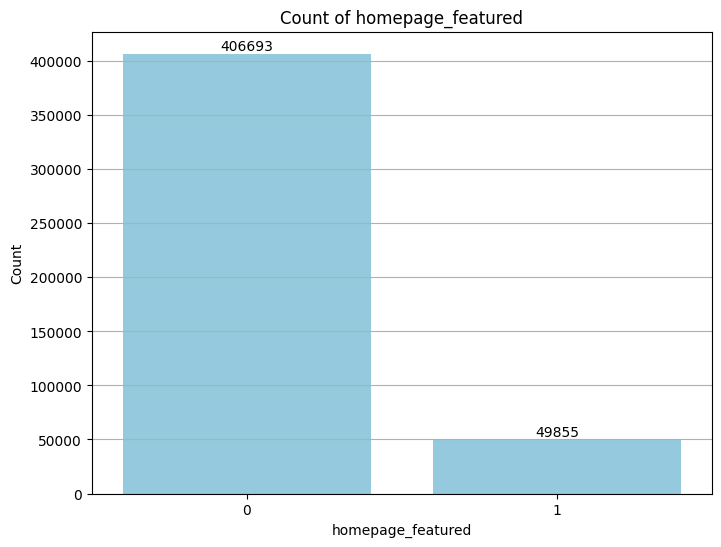

In [6]:
def histogram_of(col: str, df: pd.DataFrame = df):
    # For continuous variables
    plt.figure(figsize=(8, 6))
    if len(df[col].unique()) > 10:  # Assuming if unique values > 10, consider it continuous
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f'Histogram of {col}')
        plt.ylabel('Frequency')
    # For discrete or ordinal variables
    else:  
        ax = sns.countplot(x=col, data=df, color='skyblue')
        plt.title(f'Count of {col}')
        plt.ylabel('Count')
        
        # Annotate each bar with its count
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 5), 
                        textcoords = 'offset points')
        
    plt.xlabel(col)
    plt.grid(axis='y')
    plt.show()

histogram_of('homepage_featured')

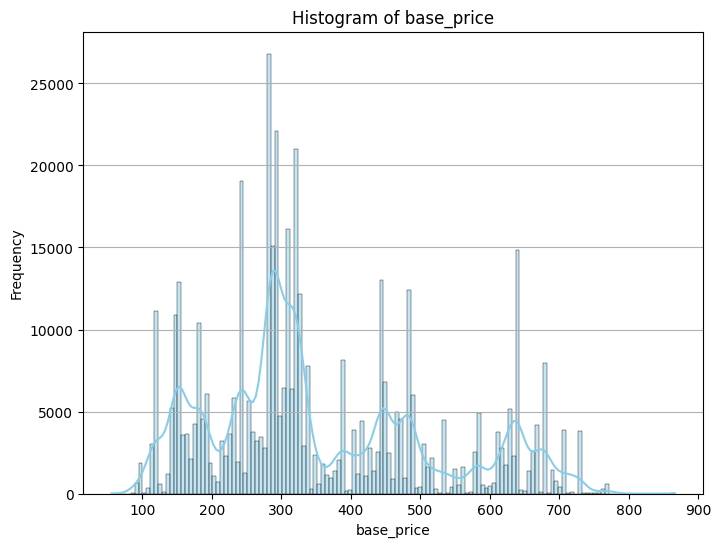

In [7]:
histogram_of('base_price')

# EDA Level 1

## Filling Up Nulls

## Changing the Data Type

## Doing Data Validation

## Mapping / Binning of Categorical Features

# EDA Level 2

## Correlation Analysis

it not being a requirement to remove highly correlated features for tree-based algorithms, as the algorithm will allocate feature importance.

In [9]:
identifier_columns = ['id']
categoric_columns = ['center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured']
numeric_columns = [col for col in list(df.columns) if col not in categoric_columns + identifier_columns]
print(numeric_columns)

['week', 'checkout_price', 'base_price', 'num_orders']


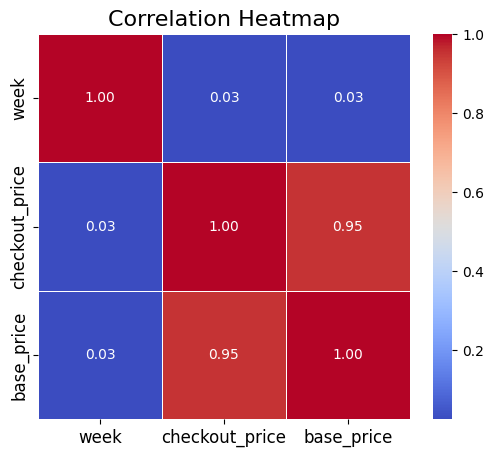

In [29]:
corr_matrix = df[numeric_columns].corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

`Note:` Base price and checkout price have a high correlation. 

## IV / WOE Values

**Information Value (IV)** helps quantify the predictive power of a feature, guiding feature selection. 

**Weight of Evidence (WOE)** transforms categorical or binned continuous features into a continuous space that enhances predictive power.

**Advantages** of IV and WOE: 
- handle missing values and outliers effectively
- convert features into a simpler, more meaningful form for predictive models. 

**Disadvantages** of IV and WOE:
- assume a linear relationship between features and the log odds of the target, which may limit their application to certain domains.

**Implementing IV and WOE**:
- Step 1: binning continuous features
- Step 2: calculating the proportion of good (event) and bad (non-event) outcomes in each bin
- Step 3: using these values to compute WOE. 

This transformation allows features to be more easily integrated into predictive models, improving risk assessment and decision-making.

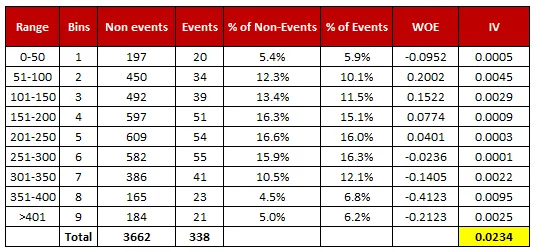

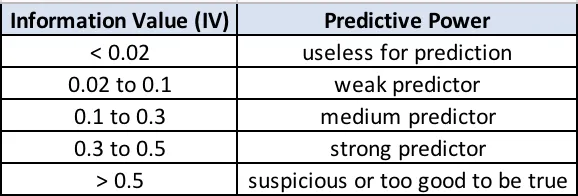

[Weight of Evidence (WOE) and Information Value (IV) Explained](https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html) for more details.

In [11]:
def iv_woe(data, target, bins=10, show_woe=False):    
    #Empty Dataframe
    newDF, woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

IVDF, woeDF = iv_woe(df, 'num_orders', bins=10, show_woe=True)

sorted_IVDF = IVDF.sort_values(by='IV', ascending=False)
display(sorted_IVDF)

C:\Users\dangc\AppData\Local\Temp\ipykernel_3524\736462802.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
c:\Users\dangc\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dangc\AppData\Local\Temp\ipykernel_3524\736462802.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
c:\Users\dangc\AppData\Local\Programs\Python\Python311\Li

Information value of id is 0.0
  Variable                   Cutoff      N    Events  % of Events  Non-Events  \
0       id  (999999.999, 1049948.7]  45655  11971955     0.100136   -11926300   
1       id   (1049948.7, 1100019.4]  45655  11949621     0.099949   -11903966   
2       id   (1100019.4, 1150087.1]  45655  11896229     0.099502   -11850574   
3       id   (1150087.1, 1200185.8]  45654  11891663     0.099464   -11846009   
4       id   (1200185.8, 1250183.5]  45655  11927520     0.099764   -11881865   
5       id   (1250183.5, 1300142.2]  45655  12081789     0.101054   -12036134   
6       id   (1300142.2, 1350207.7]  45654  11945906     0.099918   -11900252   
7       id   (1350207.7, 1400050.6]  45655  11959939     0.100035   -11914284   
8       id   (1400050.6, 1450094.3]  45655  11891349     0.099461   -11845694   
9       id   (1450094.3, 1499999.0]  45655  12041514     0.100717   -11995859   

   % of Non-Events  WoE  IV  
0    -4.198120e-09  NaN NaN  
1    -4.198120e-0

C:\Users\dangc\AppData\Local\Temp\ipykernel_3524\736462802.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
c:\Users\dangc\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dangc\AppData\Local\Temp\ipykernel_3524\736462802.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
c:\Users\dangc\AppData\Local\Programs\Python\Python311\Li

,Variable,IV
0,id,0.0
0,week,0.0
0,center_id,0.0
0,meal_id,0.0
0,checkout_price,0.0
0,base_price,0.0
0,emailer_for_promotion,0.0
0,homepage_featured,0.0


`Note:` By right we are looking for IV of 0.1 to 0.5. For those IV which are zero, It may indicate unusual data distributions or wrong handling of missing data, resulting in lack of binning.

Undersampling the majority might be one of the ways to get a more accurate study on this, but is is a case by case basis.

## Feature Importance from Models

get the feature importances from Decision Tree Classifier algorithms and see if we can find any trend from the models. 

In [20]:
dependent_col = ['num_orders']
independent_col = categoric_columns + numeric_columns

In [22]:
from sklearn.model_selection import train_test_split

# Splitting into Training and Holdout Test Sets
# Ensure stratification for now. We will adjust the ratio only later if required.
X_train, X_test, y_train, y_test = train_test_split(df[independent_col], df[dependent_col], test_size=0.2, random_state=88)

# From Standard Scaler for Numerical Columns (when necessary) Eg. Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(\
    transformers=[('num', StandardScaler(), numeric_columns)],\
    remainder='passthrough') # Pass through categorical features unchanged

X_train_transformed = preprocessor.fit_transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=independent_col)
X_test_transformed = preprocessor.fit_transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=independent_col)
y_train_transformed = y_train.values.ravel()
y_test_transformed = y_test.values.ravel()

In [24]:
# Function for getting feature importance sorted.
def feature_importance_sorted(classification_model_input, X_train, y_train):
    some_model = classification_model_input
    some_model.fit(X_train, y_train)
    
    feature_importances = some_model.feature_importances_
    feature_importances_sorted = sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True)
    df_feature_importances = pd.DataFrame(feature_importances_sorted, columns=['Feature', 'Importance'])
    df_feature_importances['rank'] = range(1, len(df_feature_importances)+1)
    return df_feature_importances

# Decision Tree Classifier Feature Importance
from sklearn.tree import DecisionTreeClassifier
dtc_fi = feature_importance_sorted(DecisionTreeClassifier(), X_train, y_train)
dtc_fi

,Feature,Importance,rank
0,week,0.373901,1
1,center_id,0.220982,2
2,checkout_price,0.192640,3
3,base_price,0.179934,4
4,meal_id,0.023067,5
5,homepage_featured,0.004751,6
6,emailer_for_promotion,0.004725,7


## Statistical Tests

run an individual t-test to check on the difference in distribution of individual features with significance $\alpha$ of 0.05 

H0: 2 independent samples have identical average (expected) values, assumes that the populations have identical variances by default.

$p \leq \alpha = 0.05$ => reject H0

In [28]:
from scipy.stats import ttest_ind
def individual_t_test(fea_1, fea_2, alpha_val):
    '''
    For continuous variable individual t-tests
    '''
    t_stat, p_val = ttest_ind(fea_1, fea_2, equal_var=False)
    t_stat1 = f'{t_stat:.3f}'
    p_val1 = f'{p_val:.3f}'
    
    if p_val < alpha_val:
        sig = 'Significant'
    else:
        sig = 'Insignificant'

    df_result = pd.DataFrame([{'t_stat': t_stat1,
                'p_value': p_val1, 'significance': sig}])
    return df_result

individual_t_test(df['center_id'], df['meal_id'], 0.05)

,t_stat,p_value,significance
0,-2388.892,0.000,Significant


`Note:` p_value < 0.05 -> 'center_id' and 'meal_id' have different distribution.

## Further Data Analysis on Imputed Data

use a quick and dirty method of coming up with boxplots to check between the two different categorical labels.

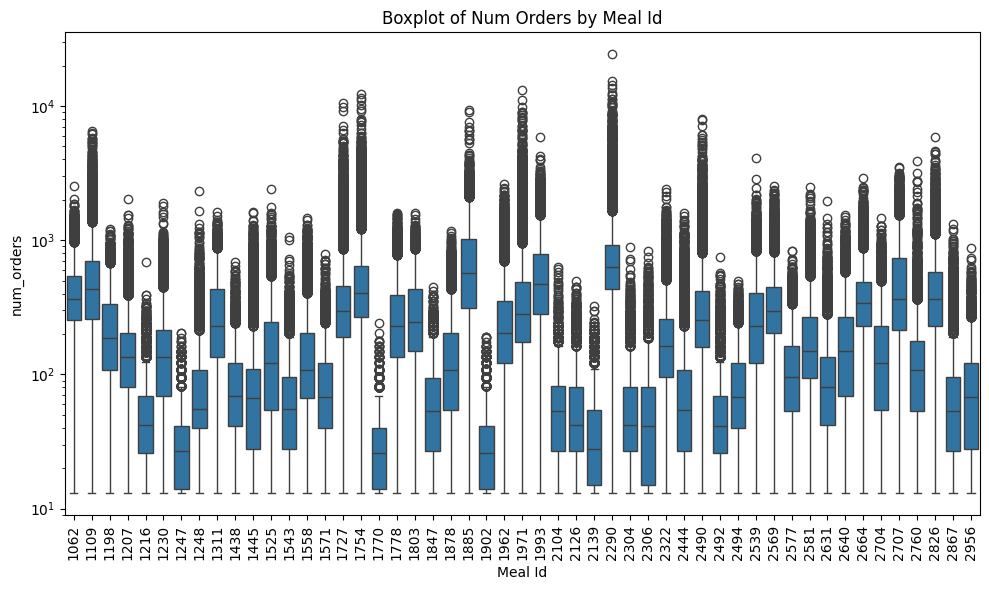

In [ ]:
# Create the boxplot
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.boxplot(x='meal_id', y='num_orders', data=df)

# Set labels and title
plt.xlabel('Meal Id')
plt.ylabel('num_orders')
plt.title('Boxplot of Num Orders by Meal Id')
plt.yscale('log')

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Infernce

[Mastering Exploratory Data Analysis (EDA): Everything You Need To Know](https://medium.com/data-and-beyond/mastering-exploratory-data-analysis-eda-everything-you-need-to-know-7e3b48d63a95)